## ARMA Modeling: Residual Diagnostics

**Functions**

`tsa.SARIMAX`, `sm.stats.diagnostic.acorr_ljungbox`, `SARIMAXResults.test_serial_correlation`,
`statsmodels.sandbox.stats.diagnostic.acorr_lm`

### Exercise 69
Compute the residuals from your preferred model from the previous exercise, as well as a random-walk model.

1. Plot the residuals
2. Is there evidence of autocorrelation in the residuals?
3. Compute the Q statistic from both sets of residuals. Is there evidence of serial correlation?
4. Compute the LM test for serial correlation. Is there evidence of serial correlation?

In [1]:
import pandas as pd
import statsmodels.tsa.api as tsa

data = pd.read_hdf("data/term-premium.h5", "term_premium")
term = data["TERM"]

mod = tsa.SARIMAX(term, order=(1, 0, 1), trend="c")
res = mod.fit()

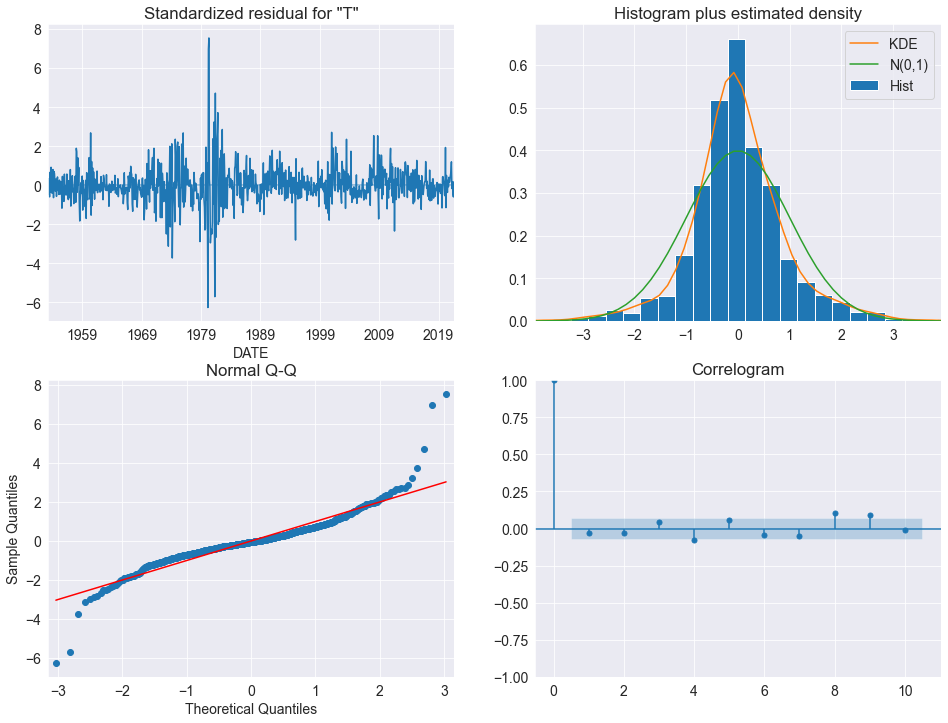

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import register_matplotlib_converters

register_matplotlib_converters()
plt.rc("figure", figsize=(16, 12))
plt.rc("font", size=14)
sns.set_style("darkgrid")

plt.rc("hist", bins=41)
fig = res.plot_diagnostics()

In [3]:
import numpy as np
from statsmodels.stats.diagnostic import acorr_ljungbox

plt.rc("figure", figsize=(16, 6))

resid = res.resid
result = acorr_ljungbox(resid, lags=12)
result

,lb_stat,lb_pvalue
1,0.623951,0.429583
2,1.437568,0.487344
3,3.269486,0.351912
4,7.910550,0.094910
5,10.632116,0.059182
6,12.132898,0.059069
7,14.495787,0.043034
8,23.200487,0.003116
9,30.371407,0.000379
10,30.514741,0.000705


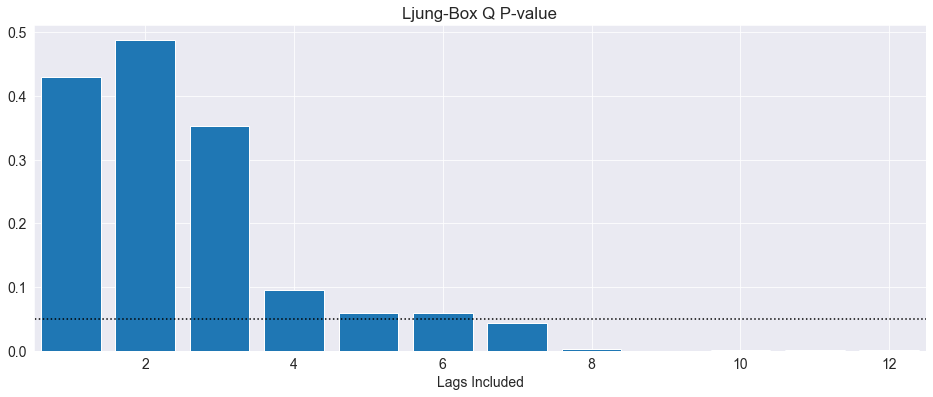

In [4]:
plt.bar(np.arange(1, 13), result.lb_pvalue)
plt.plot([0, 13], [0.05, 0.05], linestyle=":", color="black")
ax = plt.gca()
ax.set_title("Ljung-Box Q P-value")
ax.set_xlabel("Lags Included")
lim = ax.set_xlim(0.5, 12.5)

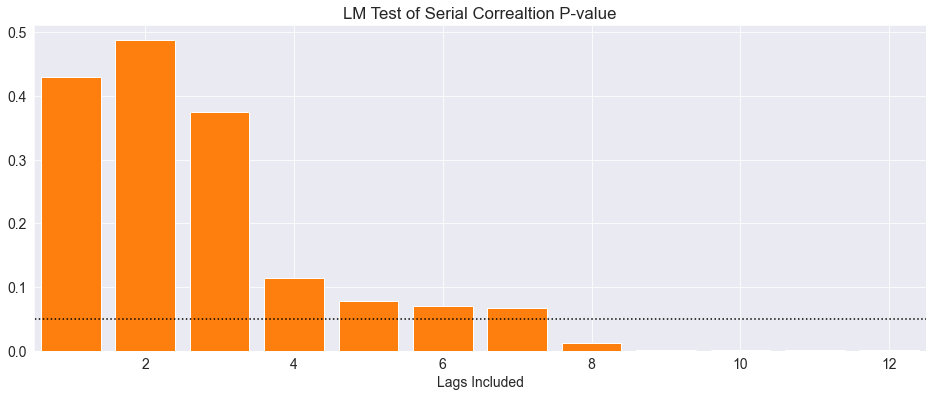

In [5]:
from statsmodels.stats.diagnostic import acorr_lm

plt.rc("figure", figsize=(16, 6))

colors = sns.color_palette()
pval = {}
for i in range(1, 13):
    stat, pv, _, _ = acorr_lm(resid, i, None)
    pval[i] = pv
pval = pd.Series(pval)
plt.bar(np.arange(1, 13), pval, color=colors[1])
plt.plot([0, 13], [0.05, 0.05], linestyle=":", color="black")
ax = plt.gca()
ax.set_title("LM Test of Serial Correaltion P-value")
ax.set_xlabel("Lags Included")
lim = ax.set_xlim(0.5, 12.5)